In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt

df = pd.read_excel('F:\\tech_layoffs.xlsx')
print(df)

            company  total_layoffs  impacted_workforce_percentage  \
0              C2FO             20                              2   
1          VideoAmp             95                              2   
2          Amperity             13                              3   
3           Addepar             20                              3   
4    Thirty Madison             24                              3   
..              ...            ...                            ...   
484      Salesforce           9090                             24   
485          Oracle             95                             24   
486      LivePerson             95                             24   
487          Skillz             95                             24   
488       Blueboard             95                             24   

    reported_date               industry headquarter_location  \
0      2022-12-09                Fintech          Leawood, KS   
1      2022-09-19  Advertising platforms 

In [68]:
Companies=df['company'].count()
Total_layoffs = df['total_layoffs'].sum()
workforce_percentage = round(df['impacted_workforce_percentage'].mean(),2)
print('Number of companies is {}'.format(Companies))
print('Total number of layoffs is {}'.format(Total_layoffs))
print('The average percentage of the affected workforce is {}'.format(workforce_percentage))

Number of companies is 489
Total number of layoffs is 155446
The average percentage of the affected workforce is 23.91


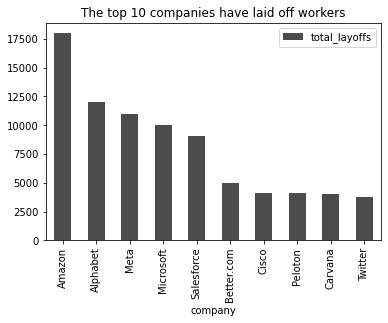

In [6]:
#The top 10 companies have laid off workers
new_df = df.sort_values(by ='total_layoffs',ascending = False)
companies = new_df.iloc[:10,:2].set_index('company')
companies.plot(kind='bar',color = 'k', alpha = 0.7)
plt.title('The top 10 companies have laid off workers')
plt.show()

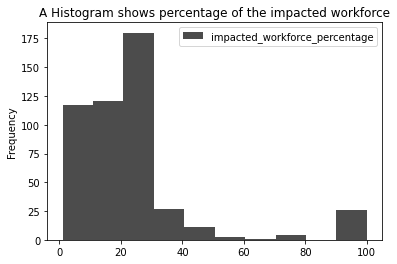

In [7]:
#A graph depicts the percentage of the workforce that is affected.
new_df = df.sort_values(by ='impacted_workforce_percentage',ascending = False)
companies = new_df[['company','impacted_workforce_percentage']].set_index('company')
companies.plot(kind='hist',color = 'k', alpha = 0.7)
plt.title('A Histogram shows percentage of the impacted workforce')
plt.show()


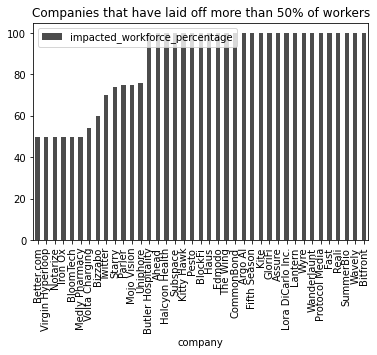

In [9]:
#Companies that have laid off more than 50% of workers
company = df[df.impacted_workforce_percentage > 49].sort_values(by ='impacted_workforce_percentage',ascending = True)
companies = company[['company','impacted_workforce_percentage']].set_index('company')
companies.plot(kind = 'bar', color ='k',alpha = 0.7 )
plt.title('Companies that have laid off more than 50% of workers')
plt.show()


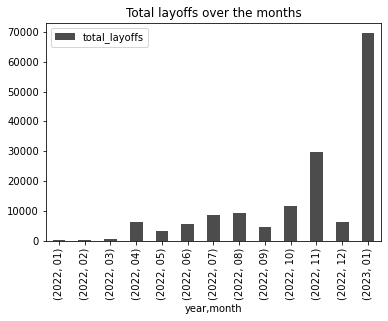

In [24]:
#Total layoffs over the months
df['year'] = df['reported_date'].dt.strftime('%Y')
df['month'] = df['reported_date'].dt.strftime('%m')
year = df.groupby(['year','month'])
total_layoffs =  year.agg({'total_layoffs':'sum'})
total_layoffs.plot(kind = 'bar',color ='k',alpha = 0.7 )
plt.title('Total layoffs over the months')
plt.show()


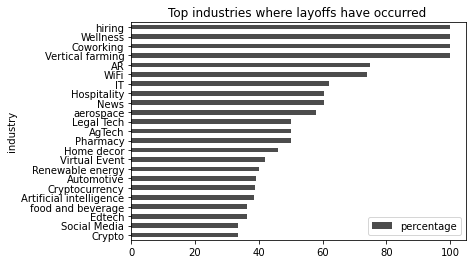

In [22]:
#industries that have laid off more than 33% of workers
industry = df.groupby('industry')
total_layoff =  industry.agg({'impacted_workforce_percentage':'mean'}).rename(columns={'impacted_workforce_percentage':'percentage'})
total_layoffs = total_layoff[total_layoff.percentage > 33].sort_values(by= 'percentage')
total_layoffs.plot(kind = 'barh',color ='k',alpha = 0.7 )
plt.title('Top industries where layoffs have occurred ')
plt.show()


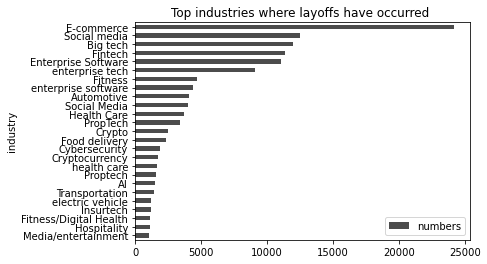

In [61]:
#Top industries where layoffs have occurred
industry = df.groupby('industry')
total_layoff =  industry.agg({'total_layoffs':'sum'}).rename(columns={'total_layoffs':'numbers'})
total_layoffs = total_layoff[total_layoff.numbers >1000].sort_values(by= 'numbers')
total_layoffs.plot(kind = 'barh',color ='k',alpha = 0.7 )
plt.title('Top industries where layoffs have occurred ')
plt.show()

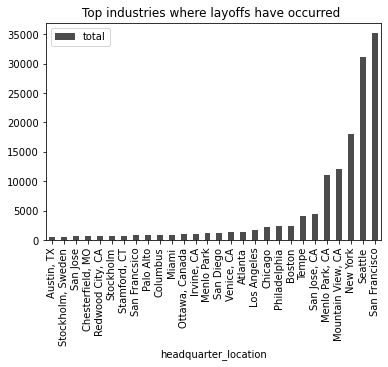

In [30]:
#Total numbers in main locations where layoffs have occurred 
location = df.groupby('headquarter_location')
total_layoff = location.agg({'total_layoffs':'sum'}).rename(columns={'total_layoffs':'total'})
total_layoffs = total_layoff[total_layoff.total >500].sort_values(by= 'total')
total_layoffs.plot(kind = 'bar',color ='k',alpha = 0.7 )
plt.title('Top industries where layoffs have occurred ')
plt.show()

Number of sources for all these information is 489 



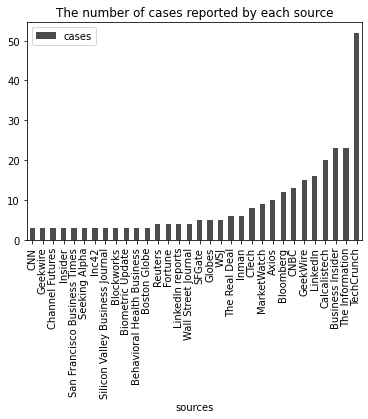

In [53]:
#The number of cases reported by each source 
sources = df['sources'].count()
print('Number of sources for all these information is {} \n'.format(sources))
source = df.groupby('sources')
Sourses = source.agg({'sources':'count'}).rename(columns={'sources':'cases'})
Sourses = Sourses[Sourses.cases >2].sort_values(by= 'cases')
Sourses.plot(kind = 'bar',color ='k',alpha = 0.7 )
plt.title('The number of cases reported by each source')
plt.show()

Number of companies in each status
 
         cases  Layoffs
status                 
Private    370    47991
Public     119   107455


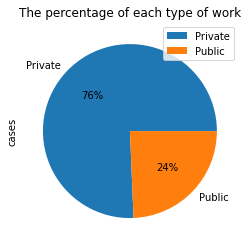

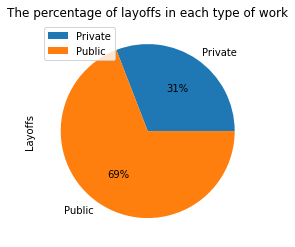

In [59]:
#The percentage of layoffs in each type of work
status = df.groupby('status')
Status = status.agg({'status':'count','total_layoffs':'sum'}).rename(columns={'status':'cases','total_layoffs':'Layoffs'})  
print('Number of companies in each status\n \n{}'.format(Status))
Status.plot(kind='pie', y='cases', autopct='%1.0f%%')
plt.title('The percentage of each type of work')
Status.plot(kind='pie', y='Layoffs', autopct='%1.0f%%')
plt.title('The percentage of layoffs in each type of work')
plt.show()

In [42]:
#Number of layoffs over months in private and public companies 
status = df.groupby(['status','year','month'])
Status = status.agg({'total_layoffs':'sum'}).rename(columns={'total_layoffs':'Total'})
print(Status)

                    Total
status  year month       
Private 2022 02       168
             03       440
             04      5878
             05      2776
             06      4389
             07      5762
             08      2937
             09      2953
             10      6610
             11      7530
             12      3292
        2023 01      5256
Public  2022 01        70
             03        95
             04       200
             05       532
             06      1028
             07      2963
             08      6432
             09      1760
             10      4875
             11     22337
             12      2920
        2023 01     64243
